## TASK 1: Bicycle Journeys: Exploratory Data Analysis

In [79]:
## importing some required libaraies for the EDA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Basic information of the dataset

- Reading dataset using read_csv function
- Top 5 rows infromation of the dataset using head() function
- Number of rows and coloumns using shape functions
- Getting information of columns data type using info() fucntion

In [80]:
data= pd.read_csv("metro (2).csv")
data.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,124657107,5,7/1/2019 0:04,7/1/2019 0:09,4312,34.066990,-118.290878,4410,34.063351,-118.296799,6168,30,One Way,Monthly Pass,standard
1,124657587,9,7/1/2019 0:07,7/1/2019 0:16,3066,34.063389,-118.236160,3066,34.063389,-118.236160,17584,30,Round Trip,Monthly Pass,electric
2,124658068,5,7/1/2019 0:20,7/1/2019 0:25,4410,34.063351,-118.296799,4312,34.066990,-118.290878,18920,30,One Way,Monthly Pass,electric
3,124659747,20,7/1/2019 0:44,7/1/2019 1:04,3045,34.028511,-118.256668,4275,34.012520,-118.285896,6016,1,One Way,Walk-up,standard
4,124660227,27,7/1/2019 0:44,7/1/2019 1:11,3035,34.048401,-118.260948,3049,34.056969,-118.253593,5867,30,One Way,Monthly Pass,standard


In [81]:
data.shape

(92124, 15)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92124 entries, 0 to 92123
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip_id              92124 non-null  int64  
 1   duration             92124 non-null  int64  
 2   start_time           92124 non-null  object 
 3   end_time             92124 non-null  object 
 4   start_station        92124 non-null  int64  
 5   start_lat            89985 non-null  float64
 6   start_lon            89985 non-null  float64
 7   end_station          92124 non-null  int64  
 8   end_lat              88052 non-null  float64
 9   end_lon              88052 non-null  float64
 10  bike_id              92124 non-null  object 
 11  plan_duration        92124 non-null  int64  
 12  trip_route_category  92124 non-null  object 
 13  passholder_type      92124 non-null  object 
 14  bike_type            92124 non-null  object 
dtypes: float64(4), int64(5), object(6)
m

- From the data informations above we observe that there are missing values in our data set coloumns.
    - start lat
    - start lon
    - end lat
    - end lon

In [83]:
### Finding out means and statistical report of the dataset
data.describe()

,trip_id,duration,start_station,start_lat,start_lon,end_station,end_lat,end_lon,plan_duration
count,9.212400e+04,92124.000000,92124.000000,89985.000000,89985.000000,92124.000000,88052.000000,88052.000000,92124.000000
mean,1.274286e+08,33.168588,3484.899690,34.034786,-118.287893,3480.271026,34.034895,-118.286699,60.290977
std,1.524134e+06,129.057841,611.483883,0.058803,0.073501,609.942741,0.058790,0.072628,111.141364
min,1.246571e+08,1.000000,3000.000000,33.710979,-118.495422,3000.000000,33.710979,-118.495422,1.000000
25%,1.261375e+08,6.000000,3029.000000,34.035801,-118.281181,3028.000000,34.037048,-118.280952,1.000000
50%,1.274911e+08,12.000000,3062.000000,34.046810,-118.258537,3062.000000,34.046810,-118.258537,30.000000
75%,1.287379e+08,22.000000,4285.000000,34.051941,-118.248253,4285.000000,34.051941,-118.248253,30.000000
max,1.303877e+08,1440.000000,4453.000000,34.177662,-118.231277,4453.000000,34.177662,-118.231277,999.000000


### EDA: Exploratory data analysis

- data cleaning
    - checking for missing values 
    - duplicate values
- outliers detections
- numeric data transformations

In [84]:
## checking for missing values
data.isnull().sum()

trip_id                   0
duration                  0
start_time                0
end_time                  0
start_station             0
start_lat              2139
start_lon              2139
end_station               0
end_lat                4072
end_lon                4072
bike_id                   0
plan_duration             0
trip_route_category       0
passholder_type           0
bike_type                 0
dtype: int64

In [85]:
## Cehcking for duplicates
data[data.duplicated(keep=False)]

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type


In [86]:
### Droping the missing value rows from the dataset
data = data.dropna().reset_index(drop=True)
data.isnull().sum()

trip_id                0
duration               0
start_time             0
end_time               0
start_station          0
start_lat              0
start_lon              0
end_station            0
end_lat                0
end_lon                0
bike_id                0
plan_duration          0
trip_route_category    0
passholder_type        0
bike_type              0
dtype: int64

### Data Transformations

- in the following cell we will transform start datet and time feature to answer the required questions

In [93]:
datetime = pd.DatetimeIndex(data["start_time"])

In [97]:
data["start_time"] = pd.to_datetime(data['start_time'], errors='coerce')

In [119]:
data["hour"]=list(datetime.hour)
data["day"]=list(datetime.day)
data["week"]=data["start_time"].dt.isocalendar().week

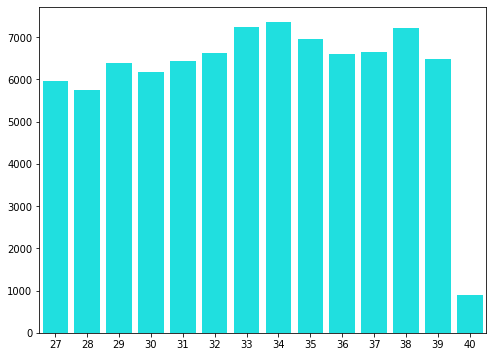

In [118]:
plt.figure(figsize=(8,6))
weeks_count=dict(data.week.value_counts())
sns.barplot(x = list(weeks_count.keys()),y =list(weeks_count.values()), color="cyan")
plt.show()

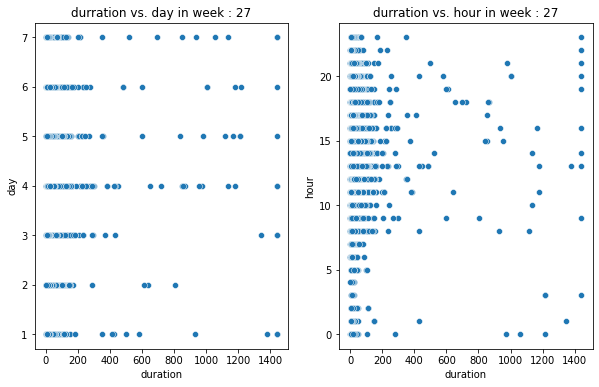

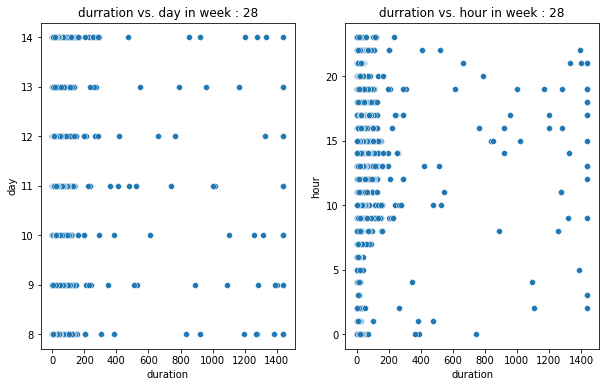

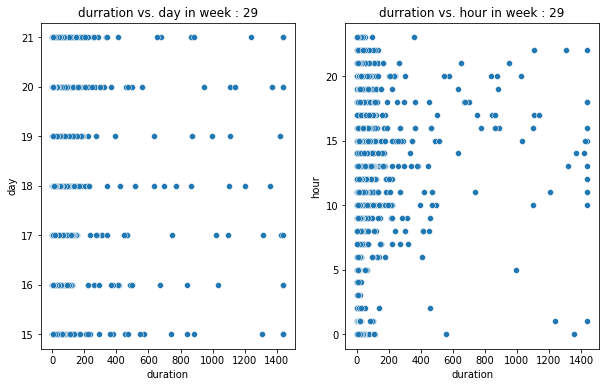

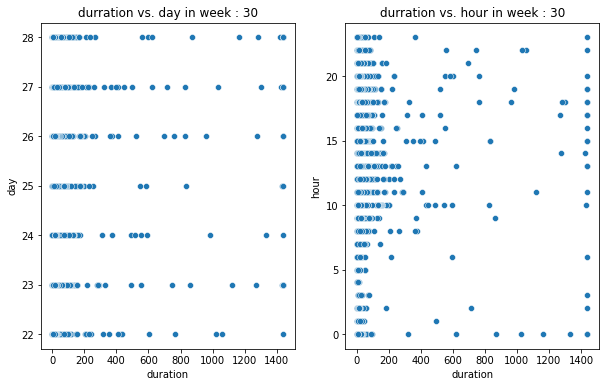

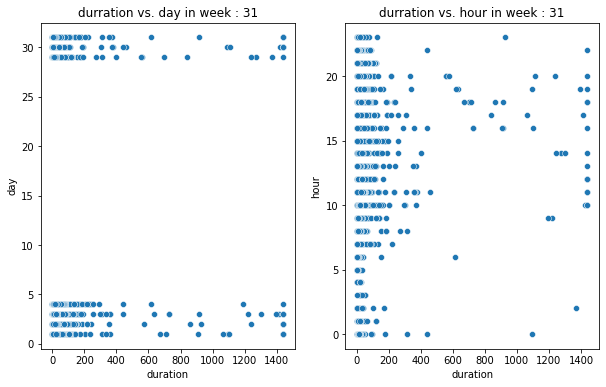

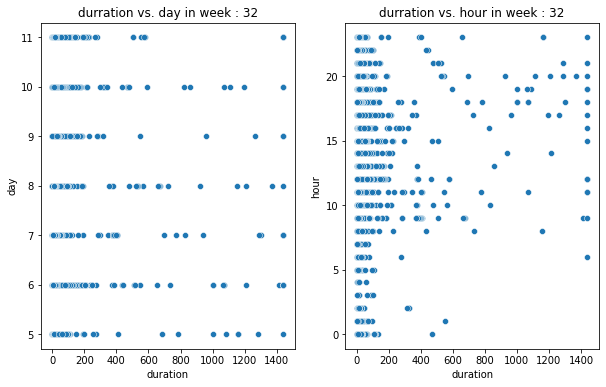

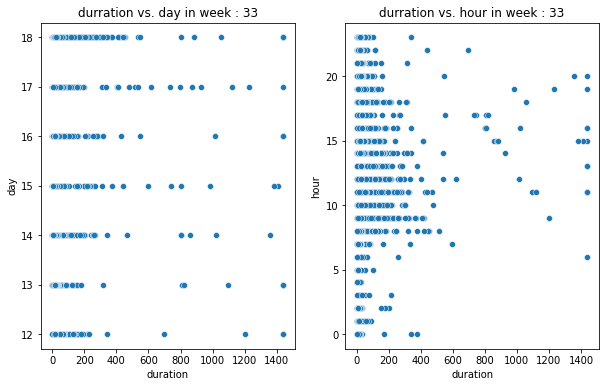

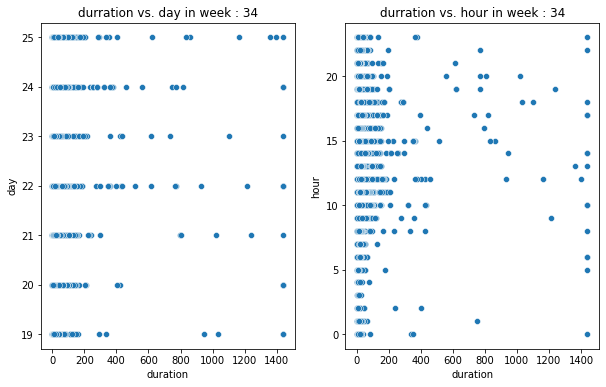

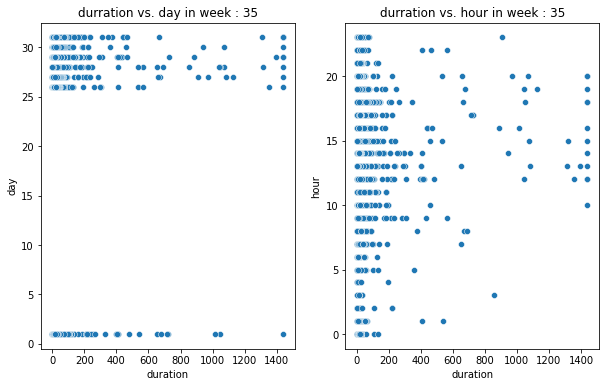

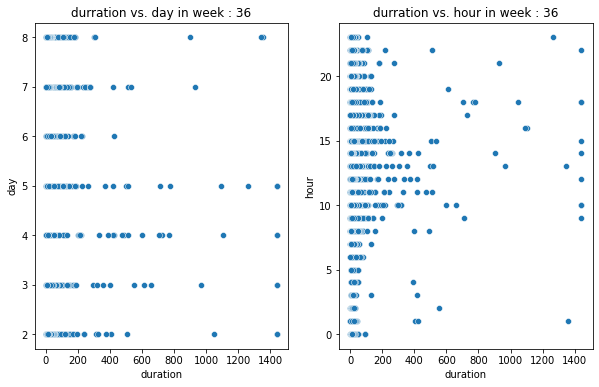

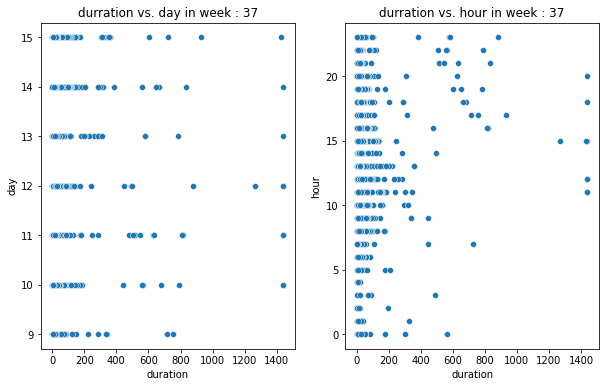

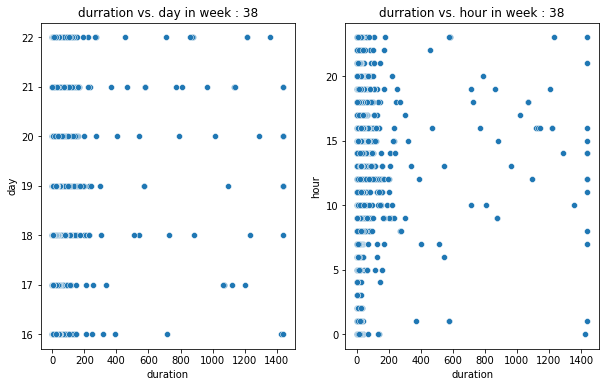

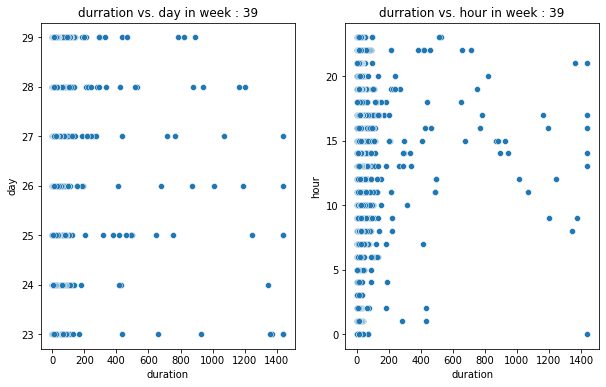

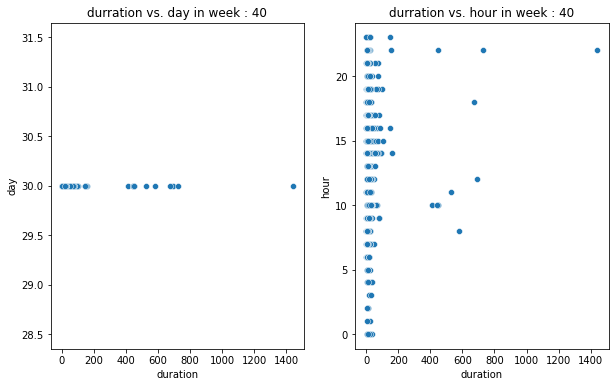

In [138]:
for week in data.week.unique():
    fig = plt.figure(figsize=(10,6))
    plt.subplot(1, 2, 1)
    w = data[data["week"] == week]
    sns.scatterplot(x=w.duration, y=w.day)
    plt.title('durration vs. day in week : '+ str(week))
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=w.duration, y=w.hour)
    plt.title('durration vs. hour in week : '+ str(week))
    plt.show()

**Methodoly in above cells:** 

- Change the date and time value to particular week of the year
- We are changing its tarnsformations here to see what happens to the durration column with each week
- As mentioned in requirment we have to analyize what happens to durration variable for each weeks first day and hour therefore we have to extract hour and day varible from start time feature. 
- After that we are ploting the durration value varibale for each day and hour of each week.

**Results:**

- From the results in the following cells we identified that this dataset consists of 14 weeks data of bike trips from 2019 from week 27 to 40. 

- And from results of bike durrations in start day for each week and bike durration of in start of each hour we can see that for almost all weeks the durration time is almost same for each day the value of durration always remains less then 600 for most of the days of the week. 

- And most of the time durration value only eceeds 100 when the hour value of dataset is greater then 10. this means the durration of bike trips increases when the hour value exceeds 10. 

### statistical tests to determine whether mean duration differs between passholder_type.

In the following cells we will check wheathe the mean duration differes between passholder type for that we will devide the dataset into 5 groups of pass holders and will check our hypothesis. Higher values of the t-score indicate that a large difference exists between the two sample sets. The smaller the t-value, the more similarity exists between the two sample sets.

we check which groups will have differences and which groups have similar kind of sample sets

In [160]:
from scipy import stats
variables = list(set(data.passholder_type))
g1 = data[data['passholder_type'] == variables[0]]["duration"]
g2 = data[data['passholder_type'] == variables[1]]["duration"]
g3 = data[data['passholder_type'] == variables[2]]["duration"]
g4 = data[data['passholder_type'] == variables[3]]["duration"]
g5 = data[data['passholder_type'] == variables[4]]["duration"]
g6 = data[data['passholder_type'] == variables[5]]["duration"]

def get_pvalue(values):
    t_score, p_value = round(values[0],2) , round(values[1],2)
    print("tscore: ", t_score,"\tp_value:",p_value)
    print()
    
print("P and T score in group", variables[0], " and ", variables[1])
values = tuple(stats.ttest_ind(g1,g2))
get_pvalue(values)

print("P and T score in group", variables[0], " and ", variables[2])
values = tuple(stats.ttest_ind(g1,g3))
get_pvalue(values)

print("P and T score in group", variables[0], " and ", variables[3])
values = tuple(stats.ttest_ind(g1,g4))
get_pvalue(values)

print("P and T score in group", variables[0], " and ", variables[4])
values = tuple(stats.ttest_ind(g1,g5))
get_pvalue(values)

print("P and T score in group", variables[0], " and ", variables[5])
values = tuple(stats.ttest_ind(g1,g6))
get_pvalue(values)

P and T score in group Testing  and  Flex Pass
tscore:  0.83 	p_value: 0.41

P and T score in group Testing  and  One Day Pass
tscore:  -1.58 	p_value: 0.11

P and T score in group Testing  and  Annual Pass
tscore:  1.18 	p_value: 0.24

P and T score in group Testing  and  Walk-up
tscore:  -0.9 	p_value: 0.37

P and T score in group Testing  and  Monthly Pass
tscore:  1.3 	p_value: 0.2



**Results from test scores**
- from the results of the following cell we can see that the values of p and t score are quite high compared to our siginficance scores which means that there are lots of disimalrities in the means of samples sets between passholder type groups

### Data visualization and distribution plots for numeric columns

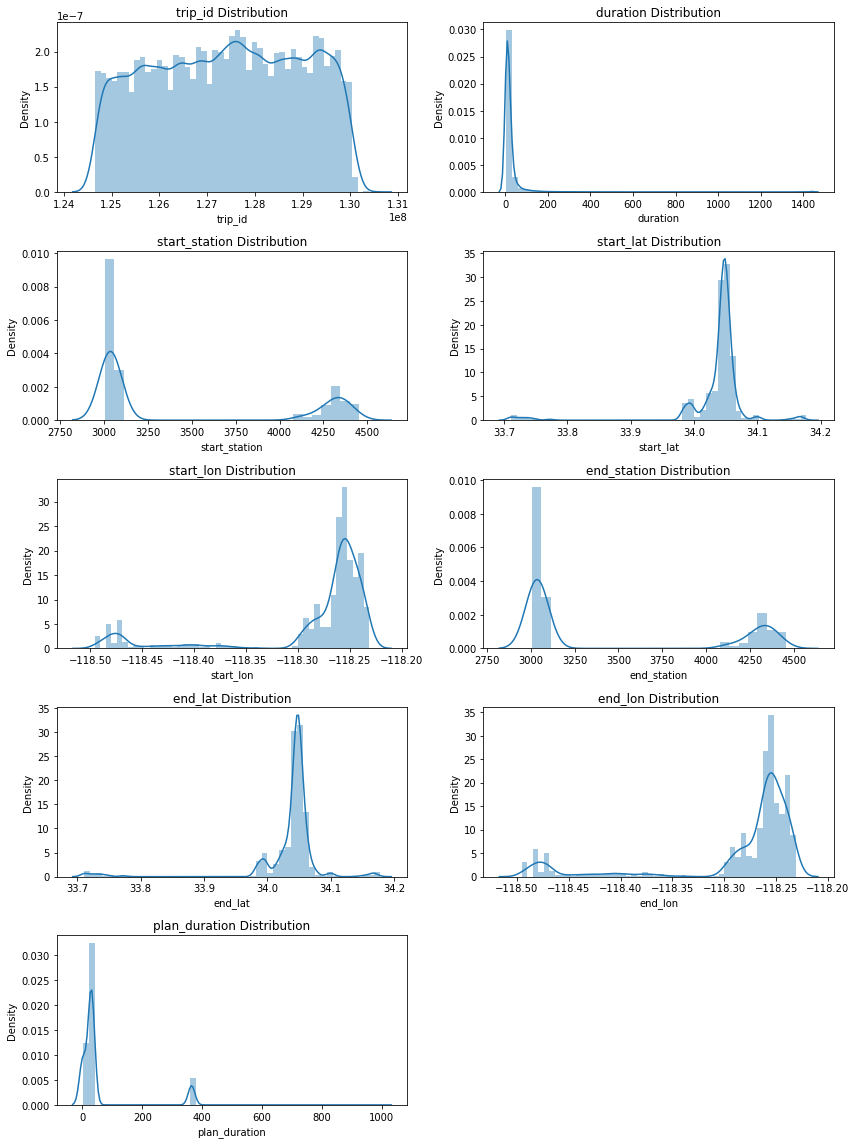

In [25]:
plt.figure(figsize=(12,16))
for i, j in enumerate(data.describe().columns):
    plt.subplot(5,2, i+1)
    sns.distplot(x=data[j])
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    plt.tight_layout()
plt.show()

### Information from the above plots

- Trip Id distribution: The data inside this column is unifromly distributed. 
- Duration: The data inside this column is right skewed
- Start station: The data of this column resembels bimodal 
- start latitude: left skewed data distribution kind of plot is visible for this column.
- start lon: left skewed data plus bimodal kind of distribution
- end lat: The data inside this column is left skewed
- plan duration: right skewed distribution of the data
- end lon: sort of bi modal plus left skewed kind of distribution of data

### Finding outliers in the dataset

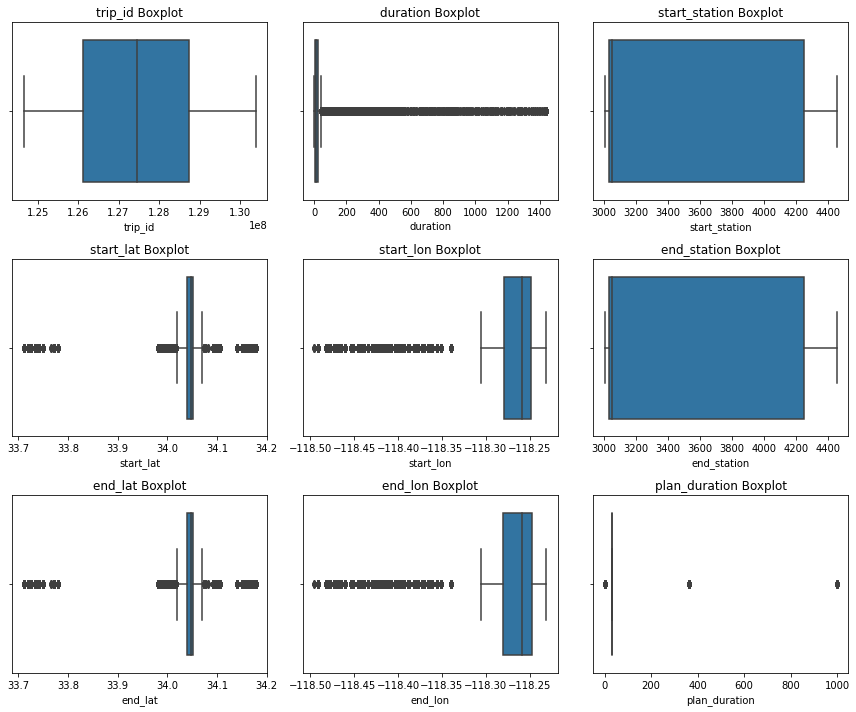

In [26]:
# Visualize the boxplot of each variable.
plt.figure(figsize=(12,10))
for i, j in enumerate(data.describe().columns):
    plt.subplot(3,3, i+1)
    sns.boxplot(x=data[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()
plt.show()

### Explaination: 

With the help of above box plots we can see the outlier values that are present in the data points for each feature in our dataset. This can be also seen in the above distribution plots as well as we said erlier that the values of longitude data are left skewed we can also see it in our IQR range the data points where value is greater then -118.30 and -118.25 are considered to be normal distributed values other then that the values are considered as outliers. 

And for start and end lat we can see that there are outlier values in both side of our box IQR which we already said that is left skewed with bimodal distributed values.

we can apply following stratigies to remove outliers from the dataset.

**Trimming:** It excludes the outlier values from our analysis. By applying this technique our data becomes thin when there are more outliers present in the dataset. Its main advantage is its fastest nature.

**Capping:** In this technique, we cap our outliers data and make the limit i.e, above a particular value or less than that value, all the values will be considered as outliers, and the number of outliers in the dataset gives that capping number.

As none of our data is normally distributed we can use **Inter-Quartile Range (IQR) proximity rule** to remove outliers from the dataset

### Bivariate variable analysis

we will compare our catagorical variables impact on our durration time in bivaritate variable analysis where we are going to compare.

- **bike type and start latitudes**, to see what kind of bikes started there journey from which parituclar start stations
- **start latitude vs durration**, this comparison we let us know which cordinates were used alot to our dataset and in which cordinates the durration of trips increases. 

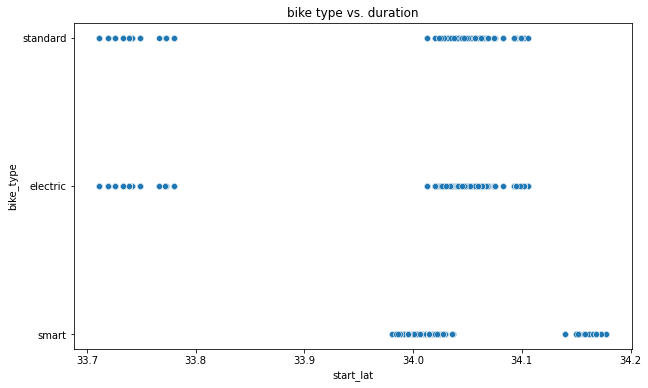

In [197]:
### bike type used in particular station
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x=data["start_lat"], y=data.bike_type)
plt.title('bike type vs. duration')
plt.show()

### Explainations of bike type vs start latitiudes

- from results above we can identify that what kind of bikes were used in which particular latitude values. we can see it from the figure that the standard and electric bikes have been used in same kind of geolocations while smart bikes have been used in different locations where electric and standard bikes were not used. 

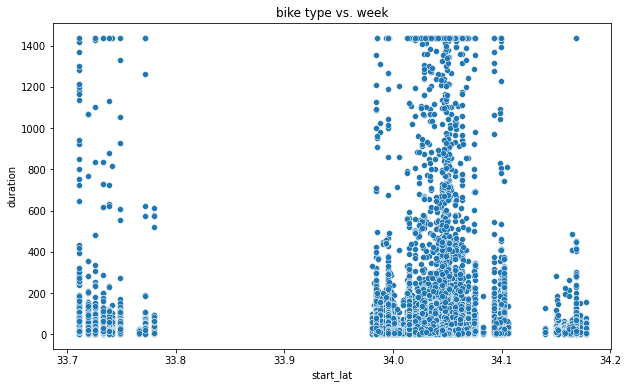

In [198]:
### bike used in particular week
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x=data["start_lat"], y=data.duration)
plt.title('start lat vs. durration')
plt.show()

### Explaination:

- From the figure above we can see that the most number of bike trips have been made between latitude value from 34.0 to 34.1. this can be seen in our box plots as well but here as we are comparing it with durration variable we can see that there is very low durration time for cordinate values which have lat values greater then 34.1.

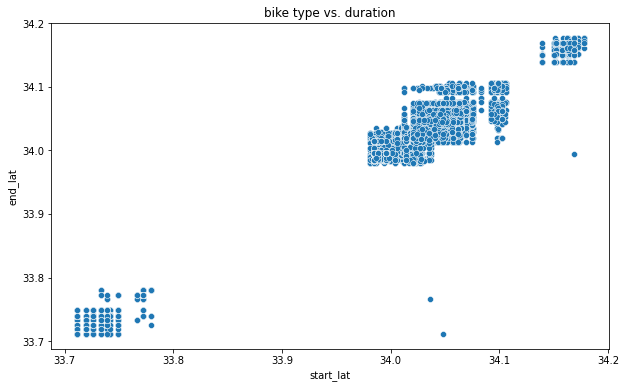

In [212]:
### bike type used in particular station
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x=data["start_lat"], y=data["end_lat"])
plt.title('bike type vs. duration')
plt.show()

### Explainations:

From the results of start latitudes and end latitude values we can see that there is no very long distances available in each part of the dataset points. When The values of start cordniates are close to 33.7 and 33.8 then the end station values are also in similar set of cordinates which means that the distance between each trip here is very small.

There are only few large distances that we can identify in the start cordinates between 34.0 and 34.1 where end station values are ended between 33.8 and 33.7. It is possible that these might be the outlier values in the dataset or trip having very long distances data. 

### Insights from Correlation matrix 

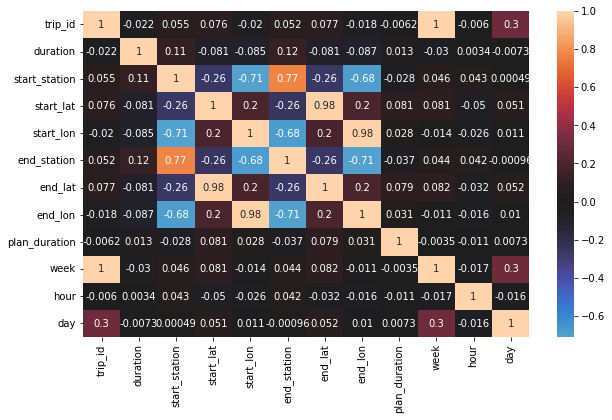

In [169]:
fig= plt.figure(figsize=(10, 6))
cormatt = data.corr()
sns.heatmap(cormatt,annot=True,center=0)
plt.show()

### Details orelation matrix to find out corelations between the fetaures

- The features which are highly corelated to each other should not be include to together for better accuracy of the model. 

- from the results below for each feature in our dataset we can see that the same kind of variable have very similar kind of value in each both feature. for example if we check.

    - start station and end station they both have high corelation of 0.77
    - similarly for start lat and end lat also have corelation value of 0.98 which is very have while passing features to out model we have to conside passing one of these two features. 
    - this also holds true for start lon and end lon that the correlation between these two features is also very high to pass these feature for our machine learning model we have to choose one these two features as well. 

## TASK 2:– Seed Shapes: Data Clustering

In [214]:
data = pd.read_csv("seeds (1).csv")
data.head()

,area,perimeter,compactness,length,width,asymmetry,groove_length
0,15.26,14.84,0.871,5.763,3.312,2.221,5.220
1,14.88,14.57,0.881,5.554,3.333,1.018,4.956
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825
3,13.84,13.94,0.895,5.324,3.379,2.259,4.805
4,16.14,14.99,0.903,5.658,3.562,1.355,5.175


### Getting basic information of the dataset

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           210 non-null    float64
 1   perimeter      210 non-null    float64
 2   compactness    210 non-null    float64
 3   length         210 non-null    float64
 4   width          210 non-null    float64
 5   asymmetry      210 non-null    float64
 6   groove_length  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


### Clustering using KMeans algorithm

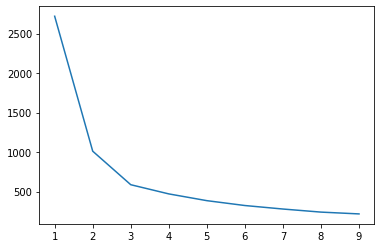

In [216]:
## checking best value of k for the clusters
from sklearn.cluster import KMeans
lss = list()
X = data.iloc[:, [0,1,2,3,4,5,6]].values
for i in range(1,10):
    kmeans= KMeans(n_clusters=i, init= "k-means++",random_state=0)
    kmeans.fit(X)
    lss.append(kmeans.inertia_)
plt.plot(range(1,10), lss)  
plt.show()

In [217]:
## The best number of clusters we can get is when clusters k equal 3
kmeans= KMeans(n_clusters=3, init= "k-means++",random_state=0)
kclusters= kmeans.fit_predict(X)

In [218]:
colors = ["red", "green", "blue", "pink", "black"]
def make_visuals(X, clusters,color):
    plt.figure(figsize=(10,6))
    for i in set(clusters):
        plt.scatter(X[clusters == i, 0], X[clusters == i, 1], c = color[i],label= "label_id = "+str(i))
    plt.legend()
    plt.show()

### Visualization of clusters of kmeans

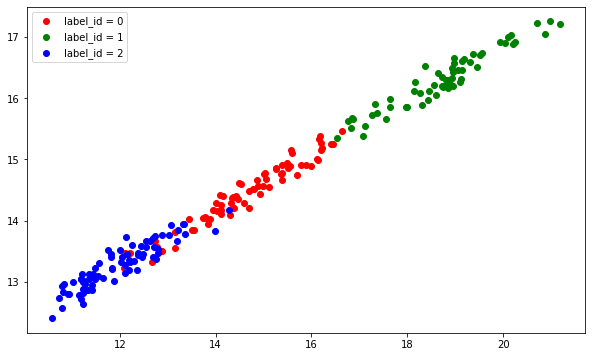

In [220]:
data["K_means"] = kclusters
make_visuals(X, kclusters,colors)

### Clustering using DBSCAN

In [221]:
from sklearn.cluster import DBSCAN
from collections import Counter
X = data.iloc[:, [0,1,2,3,4,5,6]].values
db = DBSCAN(eps=1, min_samples=10).fit(X)
labels = db.labels_
data["dbscan"] = labels

### Visualizaitons of clusters of DSCAN

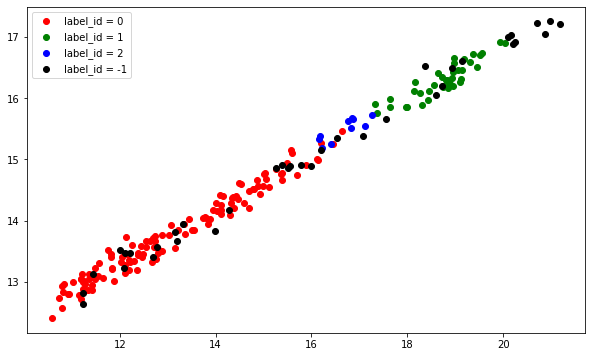

In [222]:
make_visuals(X, labels,colors)

In [223]:
def get_feature_avg(clusters,name):
    for val in set(clusters):
        print("The average values of features in each cluster id: ", val)
        print(np.mean(data[data[name] == val]))
        print()

In [224]:
get_feature_avg(kclusters, "K_means")

The average values of features in each cluster id:  0
area             14.648472
perimeter        14.460417
compactness       0.879167
length            5.563778
width             3.277903
asymmetry         2.648931
groove_length     5.192319
K_means           0.000000
dbscan           -0.055556
dtype: float64

The average values of features in each cluster id:  1
area             18.721803
perimeter        16.297377
compactness       0.885082
length            6.208934
width             3.722672
asymmetry         3.603590
groove_length     6.066098
K_means           1.000000
dbscan            0.573770
dtype: float64

The average values of features in each cluster id:  2
area             11.964416
perimeter        13.274805
compactness       0.852208
length            5.229286
width             2.872922
asymmetry         4.759740
groove_length     5.088519
K_means           2.000000
dbscan           -0.116883
dtype: float64



In [225]:
get_feature_avg(labels,"dbscan")

The average values of features in each cluster id:  0
area             13.109597
perimeter        13.782581
compactness       0.863702
length            5.375403
width             3.044839
asymmetry         3.635685
groove_length     5.118694
K_means           1.096774
dbscan            0.000000
dtype: float64

The average values of features in each cluster id:  1
area             18.743590
perimeter        16.297692
compactness       0.886590
length            6.206821
width             3.727692
asymmetry         3.036051
groove_length     6.078026
K_means           1.000000
dbscan            1.000000
dtype: float64

The average values of features in each cluster id:  2
area             16.6650
perimeter        15.4870
compactness       0.8730
length            5.9106
width             3.4810
asymmetry         4.1230
groove_length     5.8055
K_means           0.6000
dbscan            2.0000
dtype: float64

The average values of features in each cluster id:  -1
area             16.0740

### Explainations of the results

- **K means:** K-means clustering is the partitioning algorithm. K-means recreates each data in the dataset to only one of the new clusters formed. A data or data point is assigned to the adjacent cluster using a measure of distance or similarity.

    - We applied k_means on our numerical features above to see the similarity between two points this is very useful technique to group those elements which have homogenous values in there all features. From the average results of the k means features we can see that for all clusters we get different kind of feature averages. As we donot have any already clustered benchmark labels therefore we used qualitative measure like avereage of features avaliable in our dataset to see differences in the clusters. 

    - As from visualization of points we can see that cluster id 0 and cluster 2 are sort of mixed together but with minor differences we can also see that in our qualitaitve averages as there is slight differences in the average area and perimeter values of these two cluseters. however we can see complete differences in cluster id 1 and cluster id 0 where we can identify large differences of averages as well in the feature details. 

- **Dbscan:** DBSCAN represents Density-Based Spatial Clustering of Applications with Noise. It is a density-based clustering algorithm. The algorithm improves regions with adequately high density into clusters and discovers clusters of arbitrary structure in spatial databases with noise. There are some improvements in dbscan algorithm whihc discards values having noise data in some casee or we can say values have outlier points. 

    - We applied DBSCAN clusering algorithm on our features as well to find out 3 clusters in our dataset same as k-means with help of nearest neighbours and mincount startgey it clusters points on the basis of thier density based relationships with other points in the dataset. 
    - from the results of visualizations that we made of cluster labels from DBSCAN we can identify that the algorithm successfully extracted the 3 clustres that we wanted but with noise lables as well. From the qualitative results of the averages of each feature in our dataset we can cluster id 0 in this case has average area of 13 and perimeter value of 13 as well. There are also huge similarities between other features of cluster id 0 and cluster id 2 but the only feature which distinguishes these two clusters are average area and perimeter value of the features in these two cluster data points. In my point of view the very usefull detail that i exctracted using DBSCAN algorithm is it will try cluster the points considering all the feature details and if some features are mixing together in many other clusters it will make them as noise data. 
    

**Conclusion**
After looking at the results of both clustering techniques we can say that if we want to cluster every point int particular cluster based on distances based similarity measures we will use k_means as it assigns labels for each point in our dataset. However if we want to cluster the points on the basis of there density based realationships of points relationship with its closest neighbours we will use DBSCAN and it will also help us out in finding noisy points in our datasets whose values donot corelates with any other cluster point.

## Task 3 – Social Networks: Network Analysis

In [226]:
import networkx as nx

In [228]:
data = pd.read_csv("social-network (1).csv")
data.head()

,Source,Target
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


In [229]:
len(data)

2981

In [230]:
G = nx.Graph()
for i in range(0, len(data)):
    source = data["Source"][i]
    target = data["Target"][i]
    G.add_edge(source, target)

In [231]:
nx.info(G)

'Graph with 2888 nodes and 2981 edges'

### Graph visualization

In [232]:
def sort_dic(dic, number=10, visual =False):
    Deg_sorted_keys = sorted(dic, key=dic.get, reverse=True)
    i=0
    dicr = {}
    for key in Deg_sorted_keys:
            if(i>number):
                break
            else: 
                i+=1
                if(visual == True):
                    print('{0:<30}'.format(key),'{0:<6}'.format(round(dic[key],3)))
                dicr[key]= dic[key]
    return dicr

In [233]:
def visualize(G,pos):
    fig = plt.figure(figsize=(15, 15))
    #plt.subplot(1, 2, 1)
    
    # getting node sizes on the basis of there weighted indgree
    deg = dict(G.degree())
    deg_labels = sort_dic(deg,number=10)
    nx.draw_networkx(G, pos,labels= deg_labels ,node_size= [val*2.8 for val in list(deg.values())],
                     node_color=[val*0.02 for val in list(deg.values())],
                     edge_color='#00bb5e',width=1,
                     cmap=plt.cm.Reds, with_labels=True, font_size = 8,verticalalignment= "top" )
    plt.title("Graph")
    plt.axis("off")
    plt.show()

In [234]:
from tqdm import tqdm

pos = nx.kamada_kawai_layout(G)

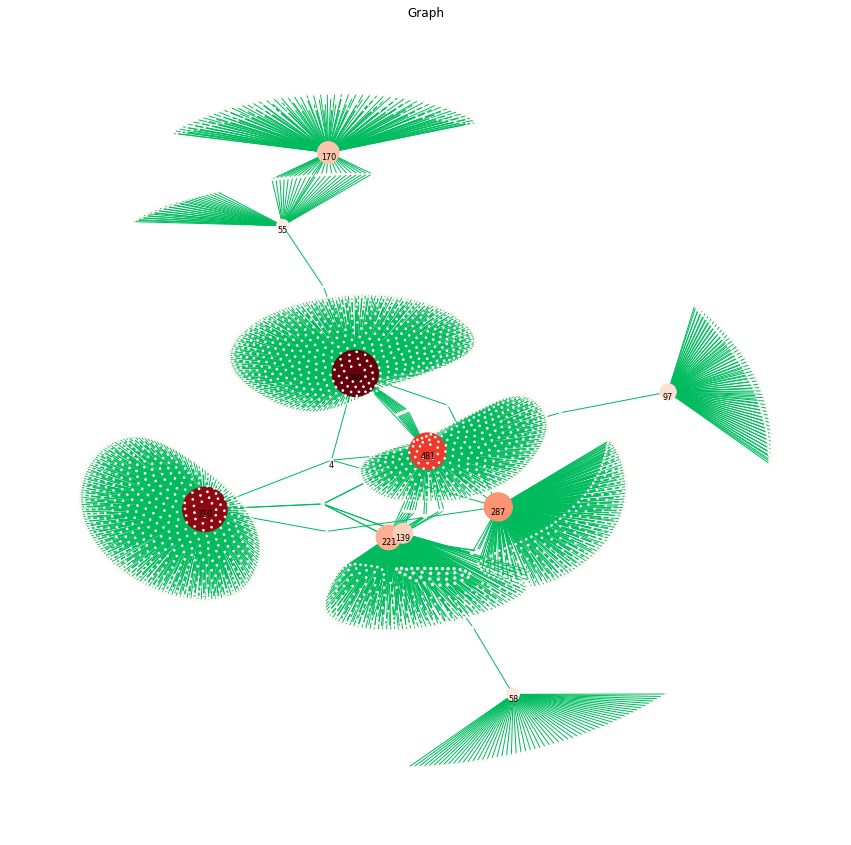

In [235]:
visualize(G,pos)

### Degree distribution plots

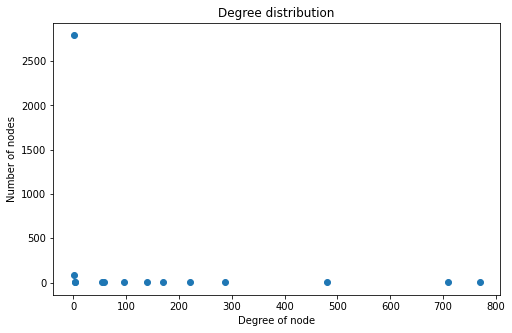

In [236]:
## degree distribution
from collections import Counter

plt.figure(figsize=(8,5))
plt.title("Degree distribution")
degree_count =Counter(list(dict(G.degree()).values()))
degree_sequence = nx.degree_histogram(G) #historgram returns counts of degrees 
degrees = range(len(degree_sequence)) #Degree values according the sequences
plt.scatter(degree_count.keys(),degree_count.values())
plt.xlabel("Degree of node") 
plt.ylabel("Number of nodes")
plt.show()

### Basic measures in the network

In [237]:
print('{0:<40}'.format("Number of node"),'{0:<6}'.format(len(G.nodes())))
print('{0:<40}'.format("Number of edges"),'{0:<6}'.format(len(G.edges())))
print('{0:<40}'.format("Average clusetring"),'{0:<6}'.format(nx.average_clustering(G)))
print('{0:<40}'.format("Network desnity"),'{0:<6}'.format(nx.density(G)))
print('{0:<40}'.format("Number of connected components"),'{0:<6}'.format(nx.number_connected_components(G)))
print('{0:<40}'.format("Diameter in the network"),'{0:<6}'.format(nx.diameter(G)))
print('{0:<40}'.format("Average shortest path"),'{0:<6}'.format(nx.average_shortest_path_length(G)))

Number of node                           2888  
Number of edges                          2981  
Average clusetring                       0.027247421431211827
Network desnity                          0.0007150690793671507
Number of connected components           1     
Diameter in the network                  9     
Average shortest path                    3.8674212512485524


### Betweeness central nodes

In [238]:
Bet = nx.betweenness_centrality(G,normalized=True)
print('{0:<30}'.format("node"),'{0:<6}'.format("Betweeness centrality"))
bet_top=sort_dic(Bet, number=20, visual=True)

node                           Betweeness centrality
603                            0.55  
288                            0.466 
1525                           0.429 
247                            0.241 
1                              0.186 
2699                           0.131 
1524                           0.13  
710                            0.127 
714                            0.113 
2687                           0.099 
2232                           0.065 
335                            0.065 
716                            0.063 
719                            0.063 
2594                           0.039 
2536                           0.039 
35                             0.024 
69                             0.022 
71                             0.009 
90                             0.003 
217                            0.003 


### Assortativity of graph

In [239]:
print("The degree assortativity in Graph", nx.degree_assortativity_coefficient(G))

The degree assortativity in Graph -0.6682140067239859
